### Challenge: Iterate and evaluate your classifier
It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

Do any of your classifiers seem to overfit?
Which seem to perform the best? Why?
Which features seemed to be most impactful to performance?
Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
amazon_cells_raw = pd.read_csv('amazon_cells_labelled.txt', '\t', header=None)
amazon_cells_raw.columns = ['review', 'positive']

In [3]:
amazon_cells_raw = pd.read_csv('amazon_cells_labelled.txt', '\t', header=None)


In [4]:
amazon_cells_raw.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [5]:
amazon_cells_raw.columns = ['review', 'positive']
amazon_cells_raw.head()

,review,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


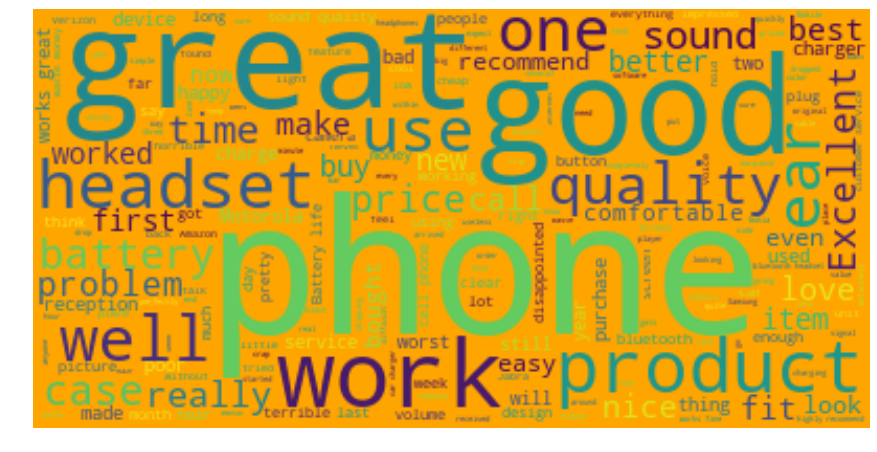

In [6]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(background_color="orange").generate(" ".join(amazon_cells_raw["review"]))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [7]:
#Find the frequency of words in the text
import re #Regular Expression
import string
frequency = {}
document_text = open('amazon_cells_labelled.txt', 'r')
text_string = document_text.read().lower()
match_pattern = re.findall(r'\b[a-z]{3,15}\b', text_string)
 
for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = frequency.keys()
 
for words in frequency_list:
    print (words, frequency[words])

there 17
way 7
for 121
plug 11
here 4
the 519
unless 3
converter 1
good 77
case 29
excellent 27
value 5
great 99
jawbone 3
tied 1
charger 19
conversations 3
lasting 2
more 19
than 28
minutes 6
major 1
problems 12
mic 4
have 73
jiggle 1
get 22
line 5
right 12
decent 4
volume 12
you 71
several 7
dozen 1
hundred 1
contacts 3
then 17
imagine 1
fun 1
sending 4
each 1
them 13
one 41
are 42
razr 5
owner 1
must 4
this 208
needless 1
say 7
wasted 2
money 19
what 17
waste 14
and 311
time 27
sound 43
quality 49
was 90
very 104
impressed 9
when 22
going 6
from 33
original 5
battery 46
extended 2
two 14
were 4
seperated 1
mere 1
started 5
notice 2
excessive 1
static 3
garbled 1
headset 48
though 3
design 11
odd 1
ear 35
clip 4
not 117
comfortable 17
all 41
highly 9
recommend 26
any 20
who 3
has 34
blue 4
tooth 2
phone 168
advise 2
everyone 3
fooled 1
far 13
works 47
clicks 1
into 10
place 4
that 82
makes 11
wonder 1
how 9
long 13
mechanism 1
would 34
last 8
went 7
motorola 13
website 2
followed 1
d

clarity 5
warning 2
wish 1
awsome 1
drained 1
dying 2
earpad 1
anyone 6
displeased 1
might 3
defect 1
risk 1
built 1
alone 2
difficult 6
install 2
restored 1
purchasing 2
moto 2
figure 2
searched 1
size 3
key 1
pad 1
lit 1
nothing 5
hard 5
wasn 3
portable 1
colleague 1
expensive 3
fully 1
bed 1
turned 3
morning 1
reading 2
memory 1
card 1
always 5
wearing 3
hat 1
sunglasses 2
timely 1
shipment 1
solid 1
surefire 1
computer 3
buyers 1
remorse 1
accessoryone 1
inexcusable 1
returning 2
changing 1
carriers 1
tmobile 1
update 1
procedure 1
cumbersome 2
motorolas 1
delivery 1
env 1
switch 2
rocketed 1
destination 1
unknown 1
under 3
conditions 1
worthwhile 2
usefulness 1
bills 1
understand 2
pricing 1
plans 1
overnight 1
batteries 2
won 2
regret 1
user 2
friendly 2
unfortunately 4
ability 2
receiving 2
pitiful 1
respect 1
exchanged 2
results 3
stuck 1
max 1
mute 1
hybrid 1
palmtop 1
cellphone 2
excels 1
those 4
roles 1
liked 1
wrong 3
described 2
bose 1
noise 3
cancelling 1
amazing 1
nyc 1


In [8]:
amazon_cells_raw.head()

,review,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [9]:
#Top positive Keywords
keywords_pos = ['work','very','great','good','use','product','quality','one','well',
           'real','price','excellent','recommend','look','call','did','buy','fit','nice','best',
           'service','love','new','item','purchase','better','ever','bought','comfortable','easy','first']

#Columns to identify if keyword in review
for key in keywords_pos:
    amazon_cells_raw[str(key)] = amazon_cells_raw.review.str.contains(
         ' '  + str(key) + ' ', 
        case=True
    )

In [10]:
amazon_cells_raw[str(key)]

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983     True
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Name: first, Length: 1000, dtype: bool

In [11]:
amazon_cells_raw[amazon_cells_raw.review.str.len() > 20]

,review,positive,work,very,great,good,use,product,quality,one,...,love,new,item,purchase,better,ever,bought,comfortable,easy,first
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,And the sound quality is great.,1,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
amazon_cells_raw['long_txt'] = amazon_cells_raw.review.str.len() > 20
amazon_cells_raw['long_txt']

0       True
1       True
2       True
3       True
4      False
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17     False
18     False
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29     False
       ...  
970     True
971    False
972     True
973    False
974     True
975     True
976    False
977     True
978     True
979    False
980     True
981     True
982     True
983     True
984     True
985     True
986     True
987     True
988     True
989     True
990     True
991    False
992     True
993    False
994     True
995     True
996     True
997     True
998     True
999     True
Name: long_txt, Length: 1000, dtype: bool

In [13]:
amazon_cells_raw['positive'] = amazon_cells_raw.positive.astype(bool)
amazon_cells_raw['positive']

0      False
1       True
2       True
3      False
4       True
5      False
6      False
7       True
8      False
9      False
10      True
11      True
12     False
13      True
14     False
15      True
16     False
17      True
18      True
19     False
20     False
21      True
22     False
23      True
24     False
25      True
26      True
27     False
28     False
29     False
       ...  
970    False
971     True
972    False
973    False
974    False
975     True
976     True
977     True
978     True
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Name: positive, Length: 1000, dtype: bool

In [14]:
amazon_cells_raw.head()

,review,positive,work,very,great,good,use,product,quality,one,...,new,item,purchase,better,ever,bought,comfortable,easy,first,long_txt
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,The mic is great.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:

amazon_cells_raw['long_txt'] = amazon_cells_raw.review.str.len() > 20
amazon_cells_raw['positive'] = amazon_cells_raw.positive.astype(bool)

data = amazon_cells_raw[keywords_pos + ['long_txt']]
target = amazon_cells_raw['positive']

# Our data is binary / boolean using Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 349


In [16]:
#Sensitivity = TP/(TP+FP), TP = [1,1], FP = [1,0], True=1, False=0
#Specitivity = TN/(TN + FN), TN = [0,0], FN = [0, 1]
A = confusion_matrix(target, y_pred)
print (A)
print ("Sensitivity of A: ", A[1,1] / (A[1,0]+A[1,1]))
print ("Specificity of A: ", A[0,0] / (A[0,1]+A[0,0]))



[[445  55]
 [294 206]]
Sensitivity of A:  0.412
Specificity of A:  0.89


The sensitivity 41.2% is not good in detecting positve word.
The specitivity 89% is good in detecting not positive word(or Negative word)

In [18]:

X_train, X_test, y_train, y_test = train_test_split(
     data, target, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 32) (800,)
(200, 32) (200,)


In [19]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data
bnb.fit(X_train, y_train)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X_train)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    X_train.shape[0],
    (y_train != y_pred).sum()
))

Number of mislabeled points out of a total 800 points : 274


In [20]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.62
Testing on Sample: 0.651


In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.67, 0.58, 0.68, 0.59, 0.59, 0.6 , 0.66, 0.68, 0.67, 0.57])